# EFEM: Quick Start Demo

In [1]:
import os, yaml, time
import torch
import matplotlib.pyplot as plt

from lib_efem.data_utils import get_dataset
from lib_efem.model_utils import load_models_dict
from lib_efem.database import load_database
from lib_efem.solver import Solver
from lib_efem.viz_utils import viz_scene_jointly

device = torch.device("cuda")

In [2]:
# Prepare config and modules
with open("./configs/demo.yaml", "r") as f:
    cfg = yaml.full_load(f)
cfg["working_dir"] = os.getcwd()
print("working dir: ", cfg["working_dir"])

model = load_models_dict(cfg, device)
dataset = get_dataset(cfg)
solver = Solver(cfg, lite_print_flag=True)
database_dict = load_database(cfg)

working dir:  /mnt/partition2/projects/EFEM


Have a look at the input data, the left is the scene point cloud and the right is the colored mesh

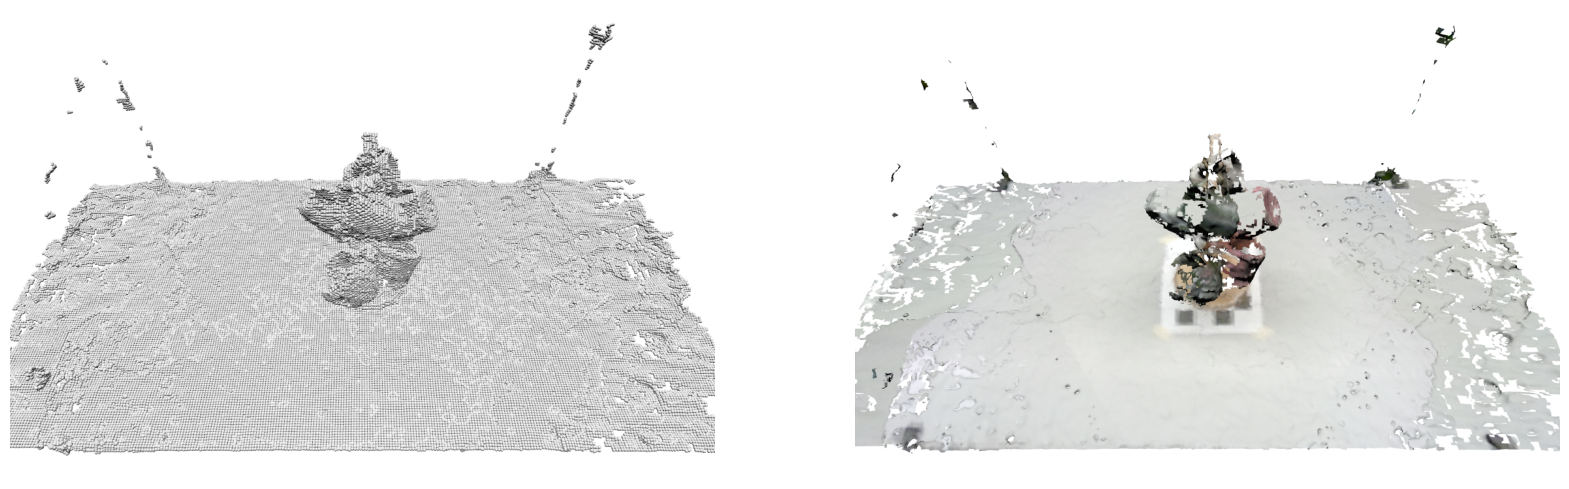

In [3]:
data_dict = dataset[0]
data_dict = dataset.to_device(data_dict, device)

viz_list = solver.viz_input(data_dict, save_flag=False, force_viz=True)
plt.figure(figsize=(20, 10))
for ind, img in enumerate(viz_list):
    plt.subplot(1, len(viz_list), ind + 1)
    plt.imshow(img)
    plt.axis("off")


Solve! EM iterations using the pre-trained single object shape prior

In [4]:
# solve
start_time = time.time()
ppt_dict, prop_cnt_statistic = solver.solve(
    model_dict=model,
    data_dict=data_dict,
    database_dict=database_dict,
    viz_prefix=f"demo_mug_tree",
    viz_dir="./demo",
    seed=12345,
)
solver_time = time.time() - start_time
print(f"finished in {solver_time:.3f}s")

phase-1


100%|██████████| 15/15 [00:17<00:00,  1.17s/it]


phase-2


100%|██████████| 5/5 [00:01<00:00,  4.96it/s]


finished in 24.164s


Choose a threshold of confidence for visualization, here we use 0.0, showing all proposals.

(-0.5, 1079.5, 719.5, -0.5)

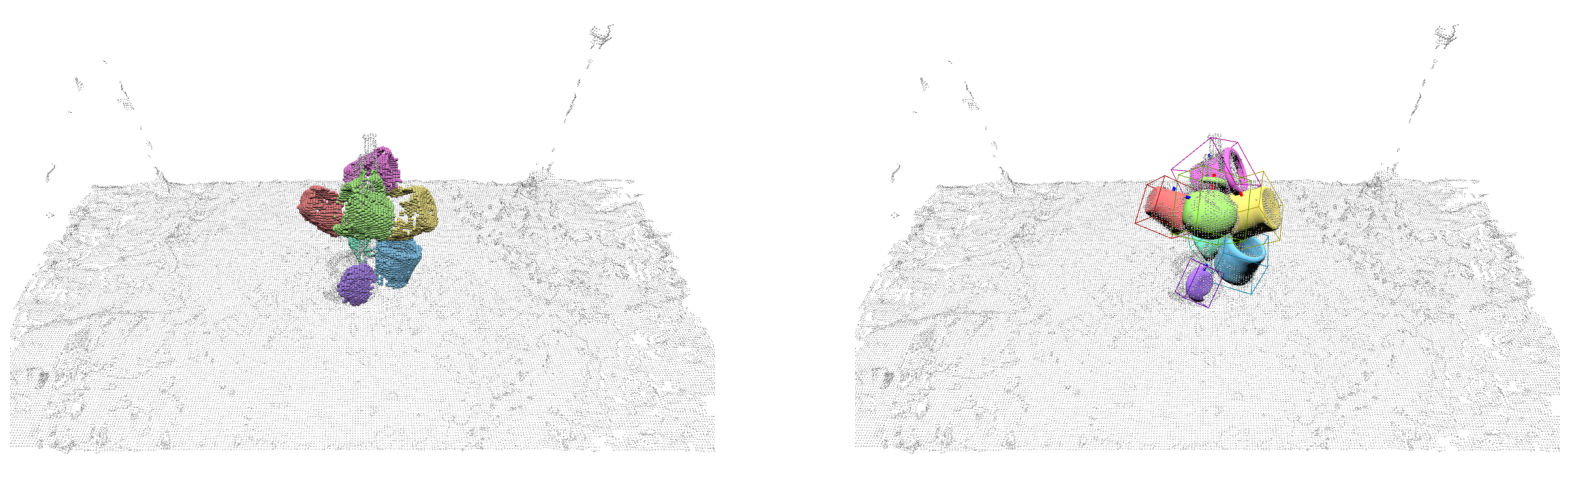

In [5]:
th = 0.0

from efem_viz import viz_solution_th

sol = {}
for k, v in ppt_dict.items():
    sol[k] = v.fetch_output()

rgb_pcl,rgb_msh = viz_solution_th(sol, th, data_dict, solver, None)["ins"]

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(rgb_pcl)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(rgb_msh)
plt.axis("off")